<a href="https://colab.research.google.com/github/Harsh-COE/ML/blob/main/ML_Heart_Clinical_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data and Library Import**


In [ ]:
import pandas as pd
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.svm import SVC 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import lightgbm as lgb
from sklearn.ensemble import ExtraTreesClassifier
df1 = pd.read_csv("https://raw.githubusercontent.com/samarth1345/hpc/main/heart_failure_clinical_records_dataset.csv?token=GHSAT0AAAAAABPG3CA53WRI7SIXPBFCPQKSY2OPHIQ" )


# **Data Visualization**

### **Plotting Histogram**

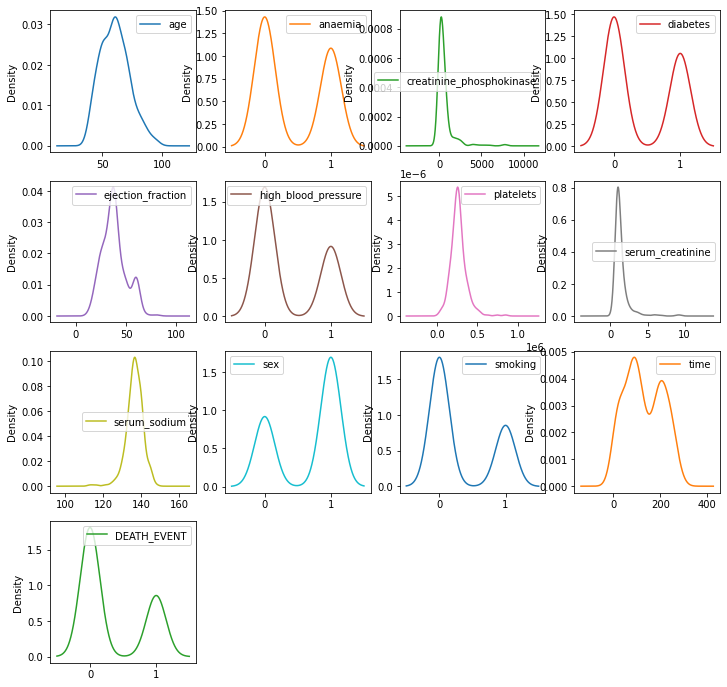

In [ ]:
df1.plot(kind = 'density', subplots= True, layout = (4,4), sharex =False, figsize = (12, 12));


### **Correlation Table**

age                         0.253729
anaemia                     0.066270
creatinine_phosphokinase    0.062728
ejection_fraction          -0.268603
high_blood_pressure         0.079351
serum_creatinine            0.294278
serum_sodium               -0.195204
time                       -0.526964
DEATH_EVENT                 1.000000
Name: DEATH_EVENT, dtype: float64

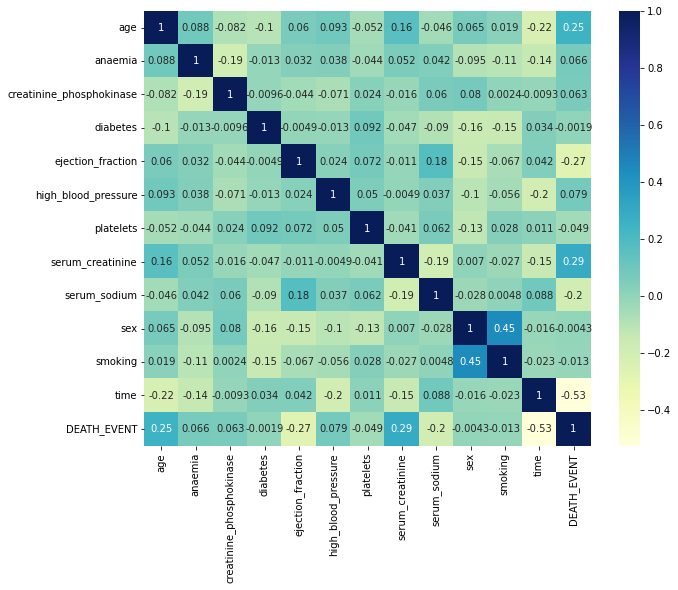

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr() ,cmap="YlGnBu", annot=True)
df1.corr()[abs(df1.corr()['DEATH_EVENT']) > 0.05]['DEATH_EVENT']

In [ ]:
# df = df1.drop(columns='time', axis=1)
# print();
# print(df1.head())


### **Count Plot**

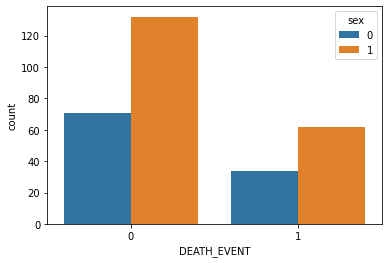

In [ ]:
sns.countplot(x='DEATH_EVENT',hue='sex',data=df1)

### **TRAINING AND TESTING DATA SPLIT**

In [ ]:
# X = df1.drop(columns='DEATH_EVENT', axis=1)
# Y = df1['DEATH_EVENT']
X = df1[['age','ejection_fraction','serum_creatinine','serum_sodium','time','creatinine_phosphokinase','anaemia','high_blood_pressure']]
Y = df1['DEATH_EVENT']

In [ ]:
print(X)
print(Y)

      age  ejection_fraction  serum_creatinine  serum_sodium  time  \
0    75.0                 20               1.9           130     4   
1    55.0                 38               1.1           136     6   
2    65.0                 20               1.3           129     7   
3    50.0                 20               1.9           137     7   
4    65.0                 20               2.7           116     8   
..    ...                ...               ...           ...   ...   
294  62.0                 38               1.1           143   270   
295  55.0                 38               1.2           139   271   
296  45.0                 60               0.8           138   278   
297  45.0                 38               1.4           140   280   
298  50.0                 45               1.6           136   285   

     creatinine_phosphokinase  anaemia  high_blood_pressure  
0                         582        0                    1  
1                        7861      

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print("Total Dataset Values and Features :-",X.shape,"\nTraining Dataset Values and Features :-",X_train.shape,"\nTesting Dataset Values and Features :-",X_test.shape)

Total Dataset Values and Features :- (299, 8) 
Training Dataset Values and Features :- (239, 8) 
Testing Dataset Values and Features :- (60, 8)


# **ML MODELS**

### **Logistic Regression**

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)
accuracy_list = []
model.fit(X_train, Y_train)
log_reg_pred = model.predict(X_test)
log_reg_acc = accuracy_score(Y_test, log_reg_pred)
accuracy_list.append(100*log_reg_acc)

Accuracy on Training data :  0.8410041841004184


In [ ]:
print(confusion_matrix(Y_test,log_reg_pred))
print(classification_report(Y_test,log_reg_pred))
print("Accuracy of Logistic Regression is : ", "{:.2f}%".format(100* log_reg_acc))


[[39  2]
 [ 6 13]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91        41
           1       0.87      0.68      0.76        19

    accuracy                           0.87        60
   macro avg       0.87      0.82      0.84        60
weighted avg       0.87      0.87      0.86        60

Accuracy of Logistic Regression is :  86.67%


Text(0.5, 1.0, 'Logistic Regression')

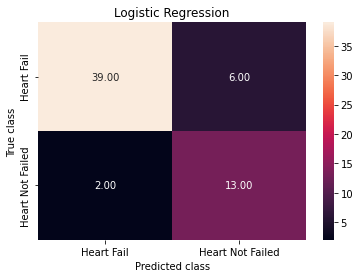

In [ ]:
X_test_prediction = model.predict(X_test)
log_reg_y_pred = model.predict(X_test)
log_reg_cm = metrics.confusion_matrix(log_reg_y_pred, Y_test)
sns.heatmap(log_reg_cm, annot=True, fmt='.2f',
xticklabels = ["Heart Fail","Heart Not Failed"] ,
yticklabels = ["Heart Fail","Heart Not Failed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')

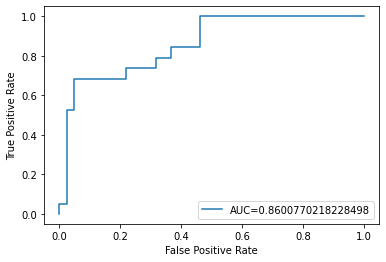

In [ ]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### **Regularized Logistic Regression**

In [ ]:
regularized_lr=LogisticRegression(penalty='l2',solver='saga',max_iter=10000)
regularized_lr.fit(X_train,Y_train)
reg_pred=regularized_lr.predict(X_test)
log_reg_acc = accuracy_score(Y_test, reg_pred)


In [ ]:
log_reg_acc = accuracy_score(Y_test, reg_pred)
print("",log_reg_acc)

 0.8


Text(0.5, 1.0, 'Regularized Logistic Regression')

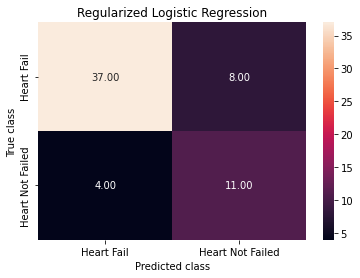

In [ ]:
reg_cm = metrics.confusion_matrix(reg_pred, Y_test)
sns.heatmap(reg_cm, annot=True, fmt='.2f',
xticklabels = ["Heart Fail","Heart Not Failed"] ,
yticklabels = ["Heart Fail","Heart Not Failed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Regularized Logistic Regression')

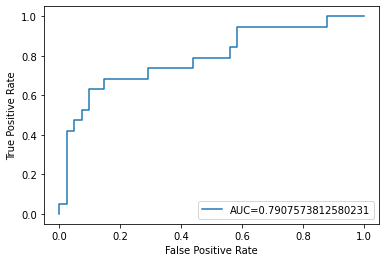

In [ ]:
y_pred_proba = regularized_lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### **K Nearest Neightbour**

[[37  4]
 [11  8]]
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        41
           1       0.67      0.42      0.52        19

    accuracy                           0.75        60
   macro avg       0.72      0.66      0.67        60
weighted avg       0.74      0.75      0.73        60



Text(0.5, 1.0, 'Logistic Regression')

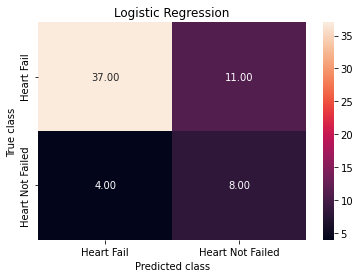

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

log_reg_cm = metrics.confusion_matrix(y_pred, Y_test)
sns.heatmap(log_reg_cm, annot=True, fmt='.2f',
xticklabels = ["Heart Fail","Heart Not Failed"] ,
yticklabels = ["Heart Fail","Heart Not Failed"])
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')





In [ ]:

training_accuracy = accuracy_score(y_pred, Y_test)
print('Accuracy on Training data : ', training_accuracy)

Accuracy on Training data :  0.75


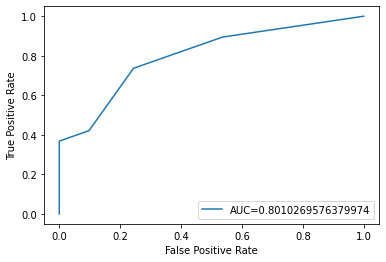

In [ ]:
y_pred_proba =classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### **Naive Bayes**

In [ ]:
nb = GaussianNB()
y_pred_nb=nb.fit(X_train, Y_train).predict(X_test)

Naive Bayes score:  0.75
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        41
           1       0.67      0.42      0.52        19

    accuracy                           0.75        60
   macro avg       0.72      0.66      0.67        60
weighted avg       0.74      0.75      0.73        60



Text(0.5, 1.0, 'Gaussian naive bayes')

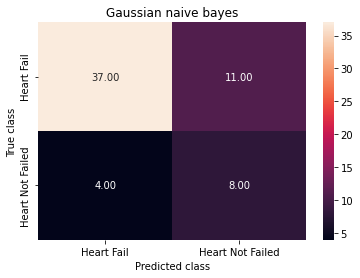

In [ ]:
print("Naive Bayes score: ",nb.score(X_test, Y_test))
print(classification_report(Y_test, y_pred_nb))

nb_cm = metrics.confusion_matrix(y_pred_nb, Y_test)
sns.heatmap(nb_cm, annot=True, fmt='.2f',
xticklabels = ["Heart Fail","Heart Not Failed"] ,
yticklabels = ["Heart Fail","Heart Not Failed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Gaussian naive bayes')




In [ ]:

#Maximum mean accuracy on 12 folds
print(cross_val_score(model,X,Y,cv=12,scoring='accuracy'))
print("Mean accuracy for logistic regression is ",cross_val_score(model,X,Y,cv=50,scoring='accuracy').mean()*100)


[0.6        0.76       0.76       0.8        0.92       0.92
 0.92       1.         0.88       0.8        0.68       0.66666667]
Mean accuracy for logistic regression is  81.93333333333334


In [ ]:
print(cross_val_score(classifier,X,Y,cv=11,scoring='accuracy'))
print("Mean accuracy for KNN is ",cross_val_score(classifier,X,Y,cv=11,scoring='accuracy').mean()*100)

[0.60714286 0.89285714 0.74074074 0.88888889 0.85185185 0.66666667
 0.7037037  0.66666667 0.66666667 0.7037037  0.7037037 ]
Mean accuracy for KNN is  73.56902356902357


In [ ]:
print(cross_val_score(nb,X,Y,cv=11,scoring='accuracy'))
print("Mean accuracy for KNN is ",cross_val_score(nb,X,Y,cv=11,scoring='accuracy').mean()*100)

[0.71428571 0.82142857 0.85185185 0.81481481 0.7037037  0.92592593
 0.66666667 0.77777778 0.7037037  0.7037037  0.74074074]
Mean accuracy for KNN is  76.5873015873016


In [ ]:
print(cross_val_score(regularized_lr,X,Y,cv=11,scoring='accuracy'))
print("Mean accuracy for logistic regression with regularization is ",cross_val_score(regularized_lr,X,Y,cv=11,scoring='accuracy').mean()*100)

[0.57142857 0.78571429 0.96296296 0.92592593 0.96296296 0.92592593
 0.96296296 0.85185185 0.7037037  0.7037037  0.7037037 ]
Mean accuracy for logistic regression with regularization is  82.37133237133239


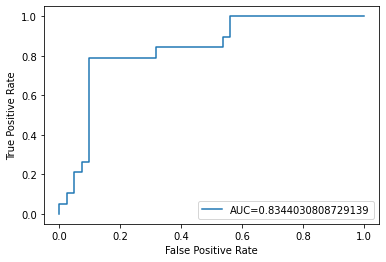

In [ ]:
y_pred_proba =nb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### **Decision Tree**

In [ ]:
decision=DecisionTreeClassifier(criterion="entropy",max_depth=5,min_samples_leaf=5)


In [ ]:
decision.fit(X_train,Y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5)

In [ ]:
Y_pred=decision.predict(X_test)

In [ ]:
accuracy=accuracy_score(Y_pred,Y_test)*100
print("Accuracy of the model is {:.2f}".format(accuracy))
confusion_matrix(Y_pred,Y_test)

Accuracy of the model is 85.00


array([[39,  7],
       [ 2, 12]])

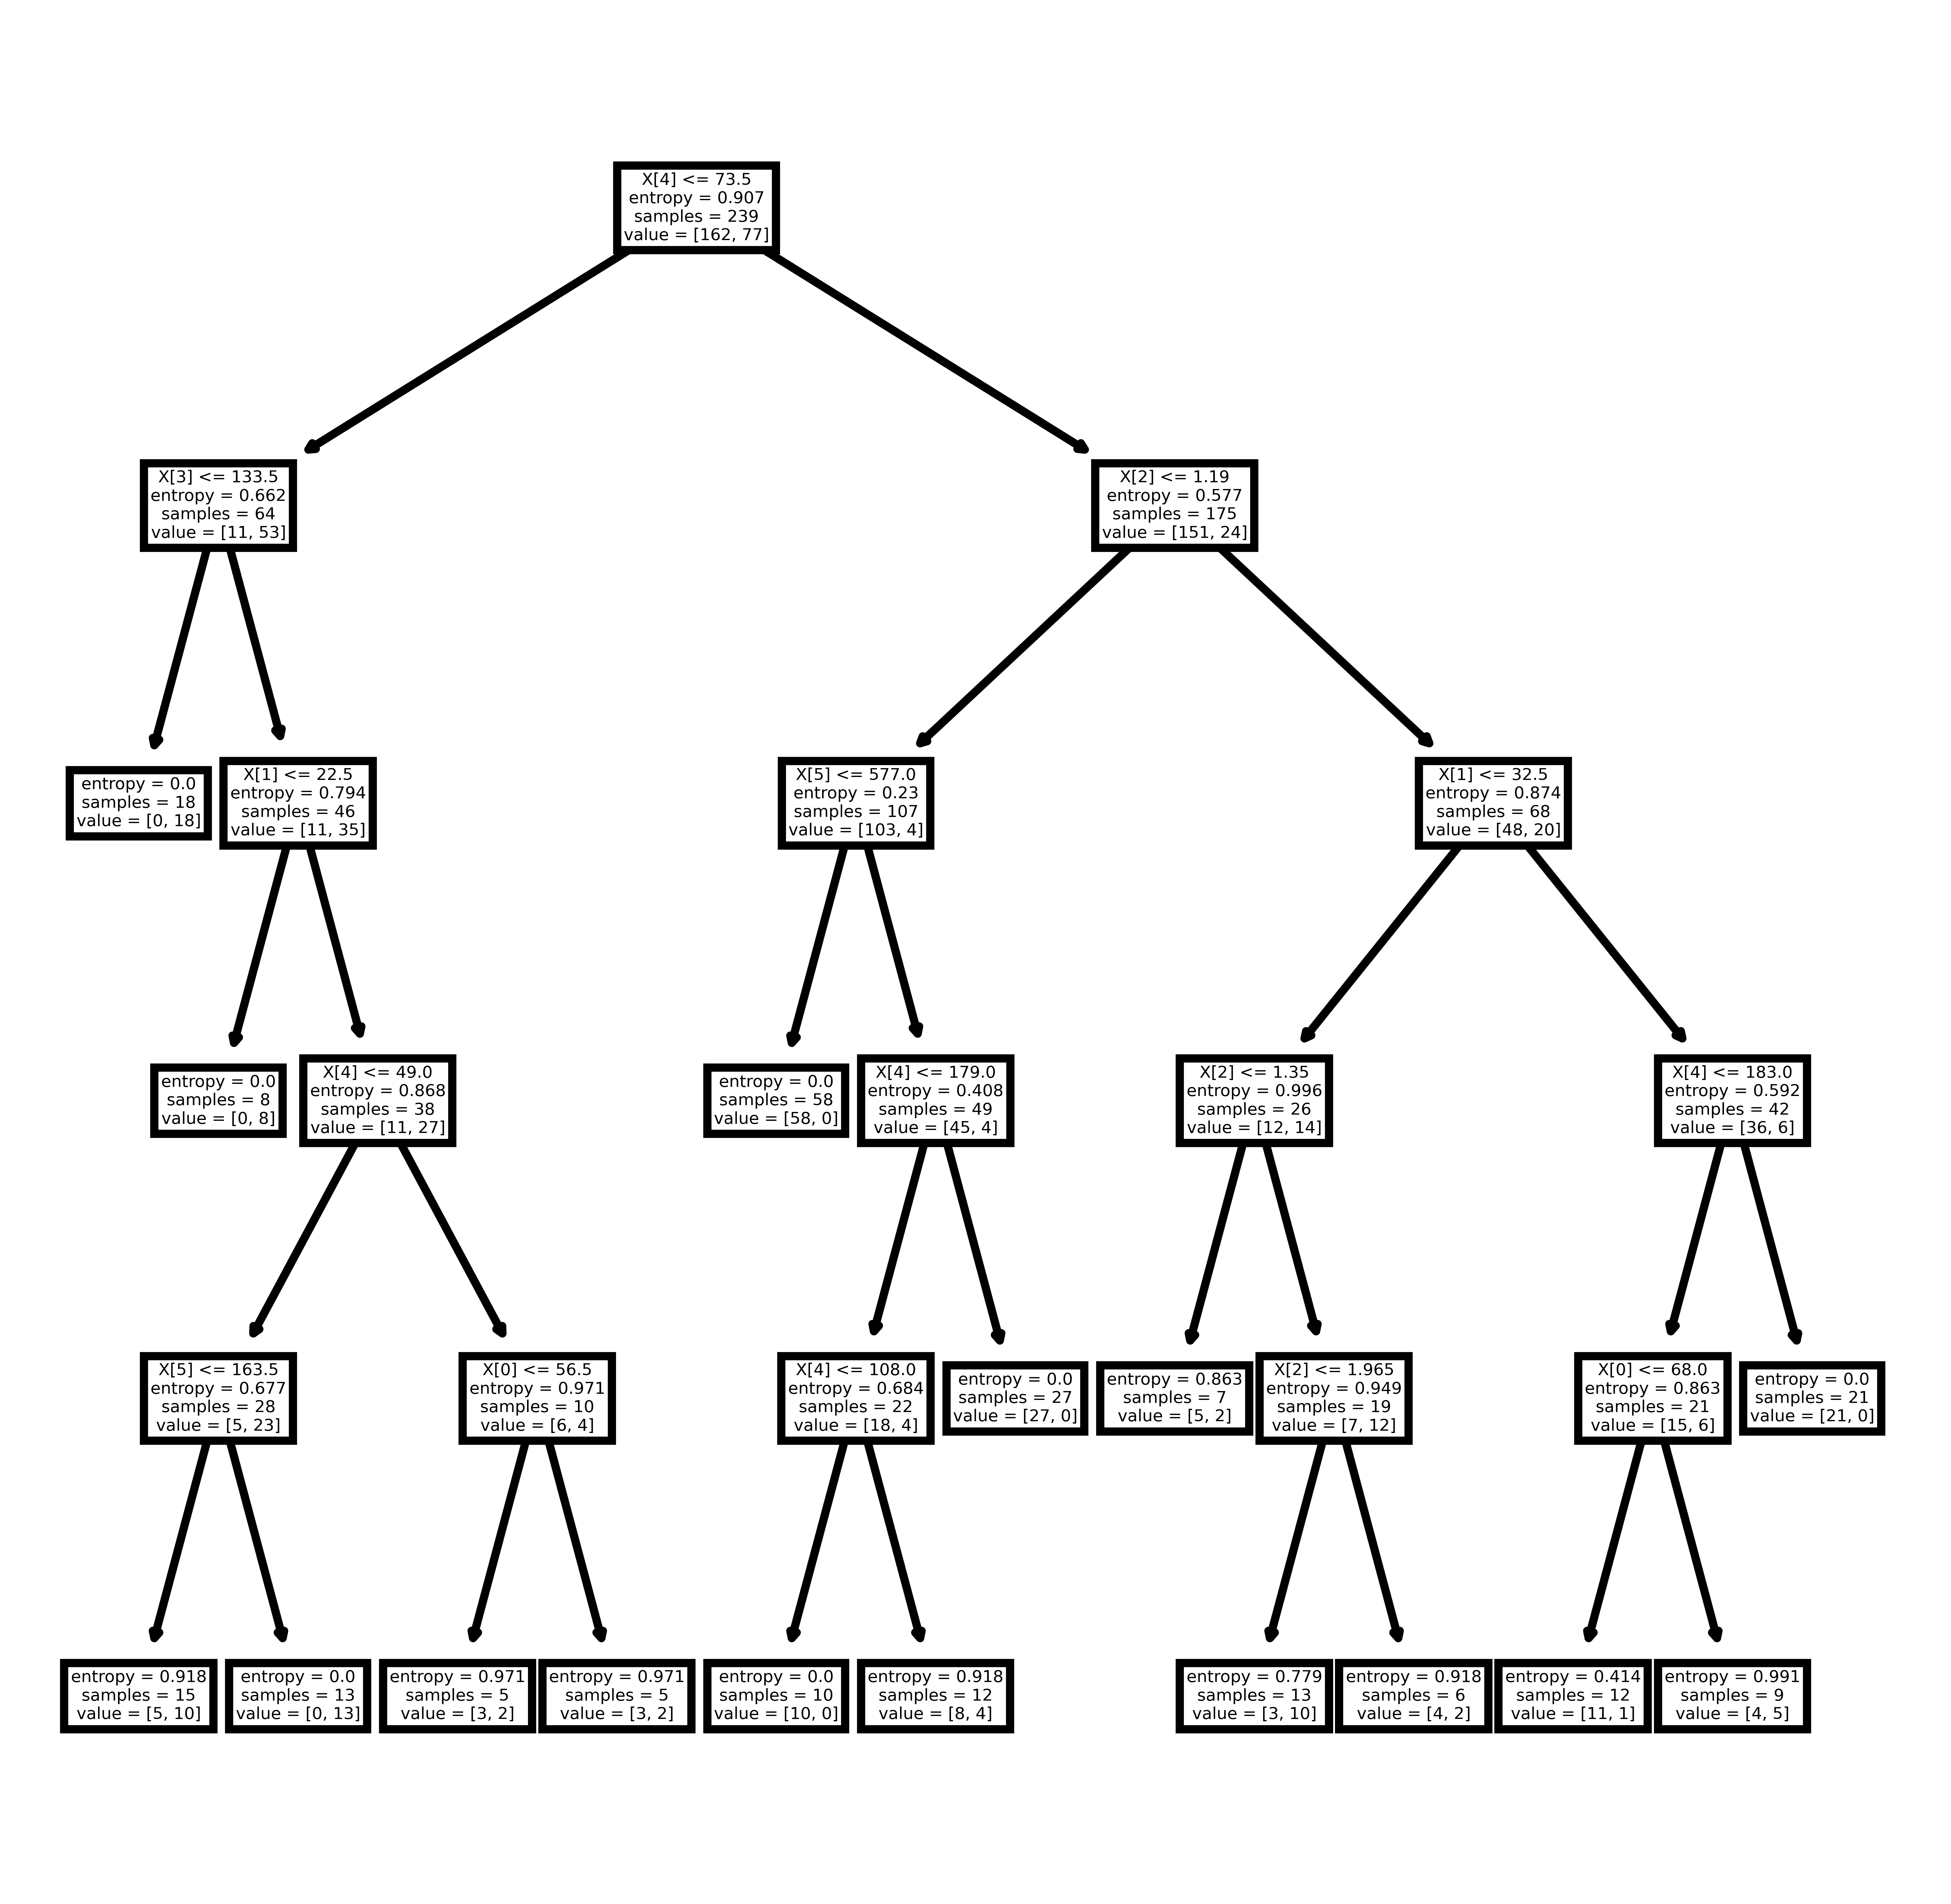

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=2000)
tree.plot_tree(decision);
fig.savefig('imagename.png')

              precision    recall  f1-score   support

           0       0.85      0.95      0.90        41
           1       0.86      0.63      0.73        19

    accuracy                           0.85        60
   macro avg       0.85      0.79      0.81        60
weighted avg       0.85      0.85      0.84        60



Text(0.5, 1.0, 'decision tree')

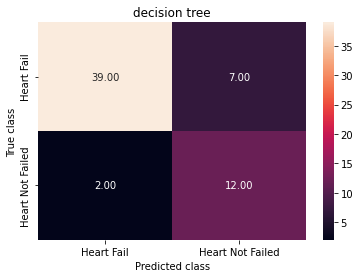

In [ ]:
print(classification_report(Y_test, Y_pred))

dc_cm = metrics.confusion_matrix(Y_pred, Y_test)
sns.heatmap(dc_cm, annot=True, fmt='.2f',
xticklabels = ["Heart Fail","Heart Not Failed"] ,
yticklabels = ["Heart Fail","Heart Not Failed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('decision tree')

In [ ]:
print(cross_val_score(decision,X,Y,cv=61,scoring='accuracy'))
print("Mean accuracy for decsion tree is ",cross_val_score(decision,X,Y,cv=61,scoring='accuracy').mean()*100)

[0.4  0.4  0.8  0.6  1.   1.   0.8  1.   0.8  1.   0.6  0.8  0.8  1.
 0.8  1.   0.6  1.   1.   0.6  1.   0.8  1.   1.   1.   1.   0.6  0.8
 0.8  0.8  0.6  0.8  0.8  0.8  0.6  1.   1.   0.8  1.   0.8  1.   0.6
 0.6  0.6  0.8  0.8  0.8  1.   0.8  0.6  0.8  1.   0.8  1.   1.   1.
 0.75 0.75 0.75 0.75 0.75]
Mean accuracy for decsion tree is  82.54098360655738


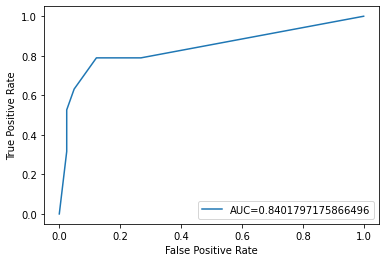

In [ ]:
y_pred_proba =decision.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_gini=DecisionTreeClassifier(criterion="gini",max_depth=5,min_samples_leaf=5)

In [ ]:
decision_gini.fit(X_train,Y_train)
Y_pred=decision_gini.predict(X_test)

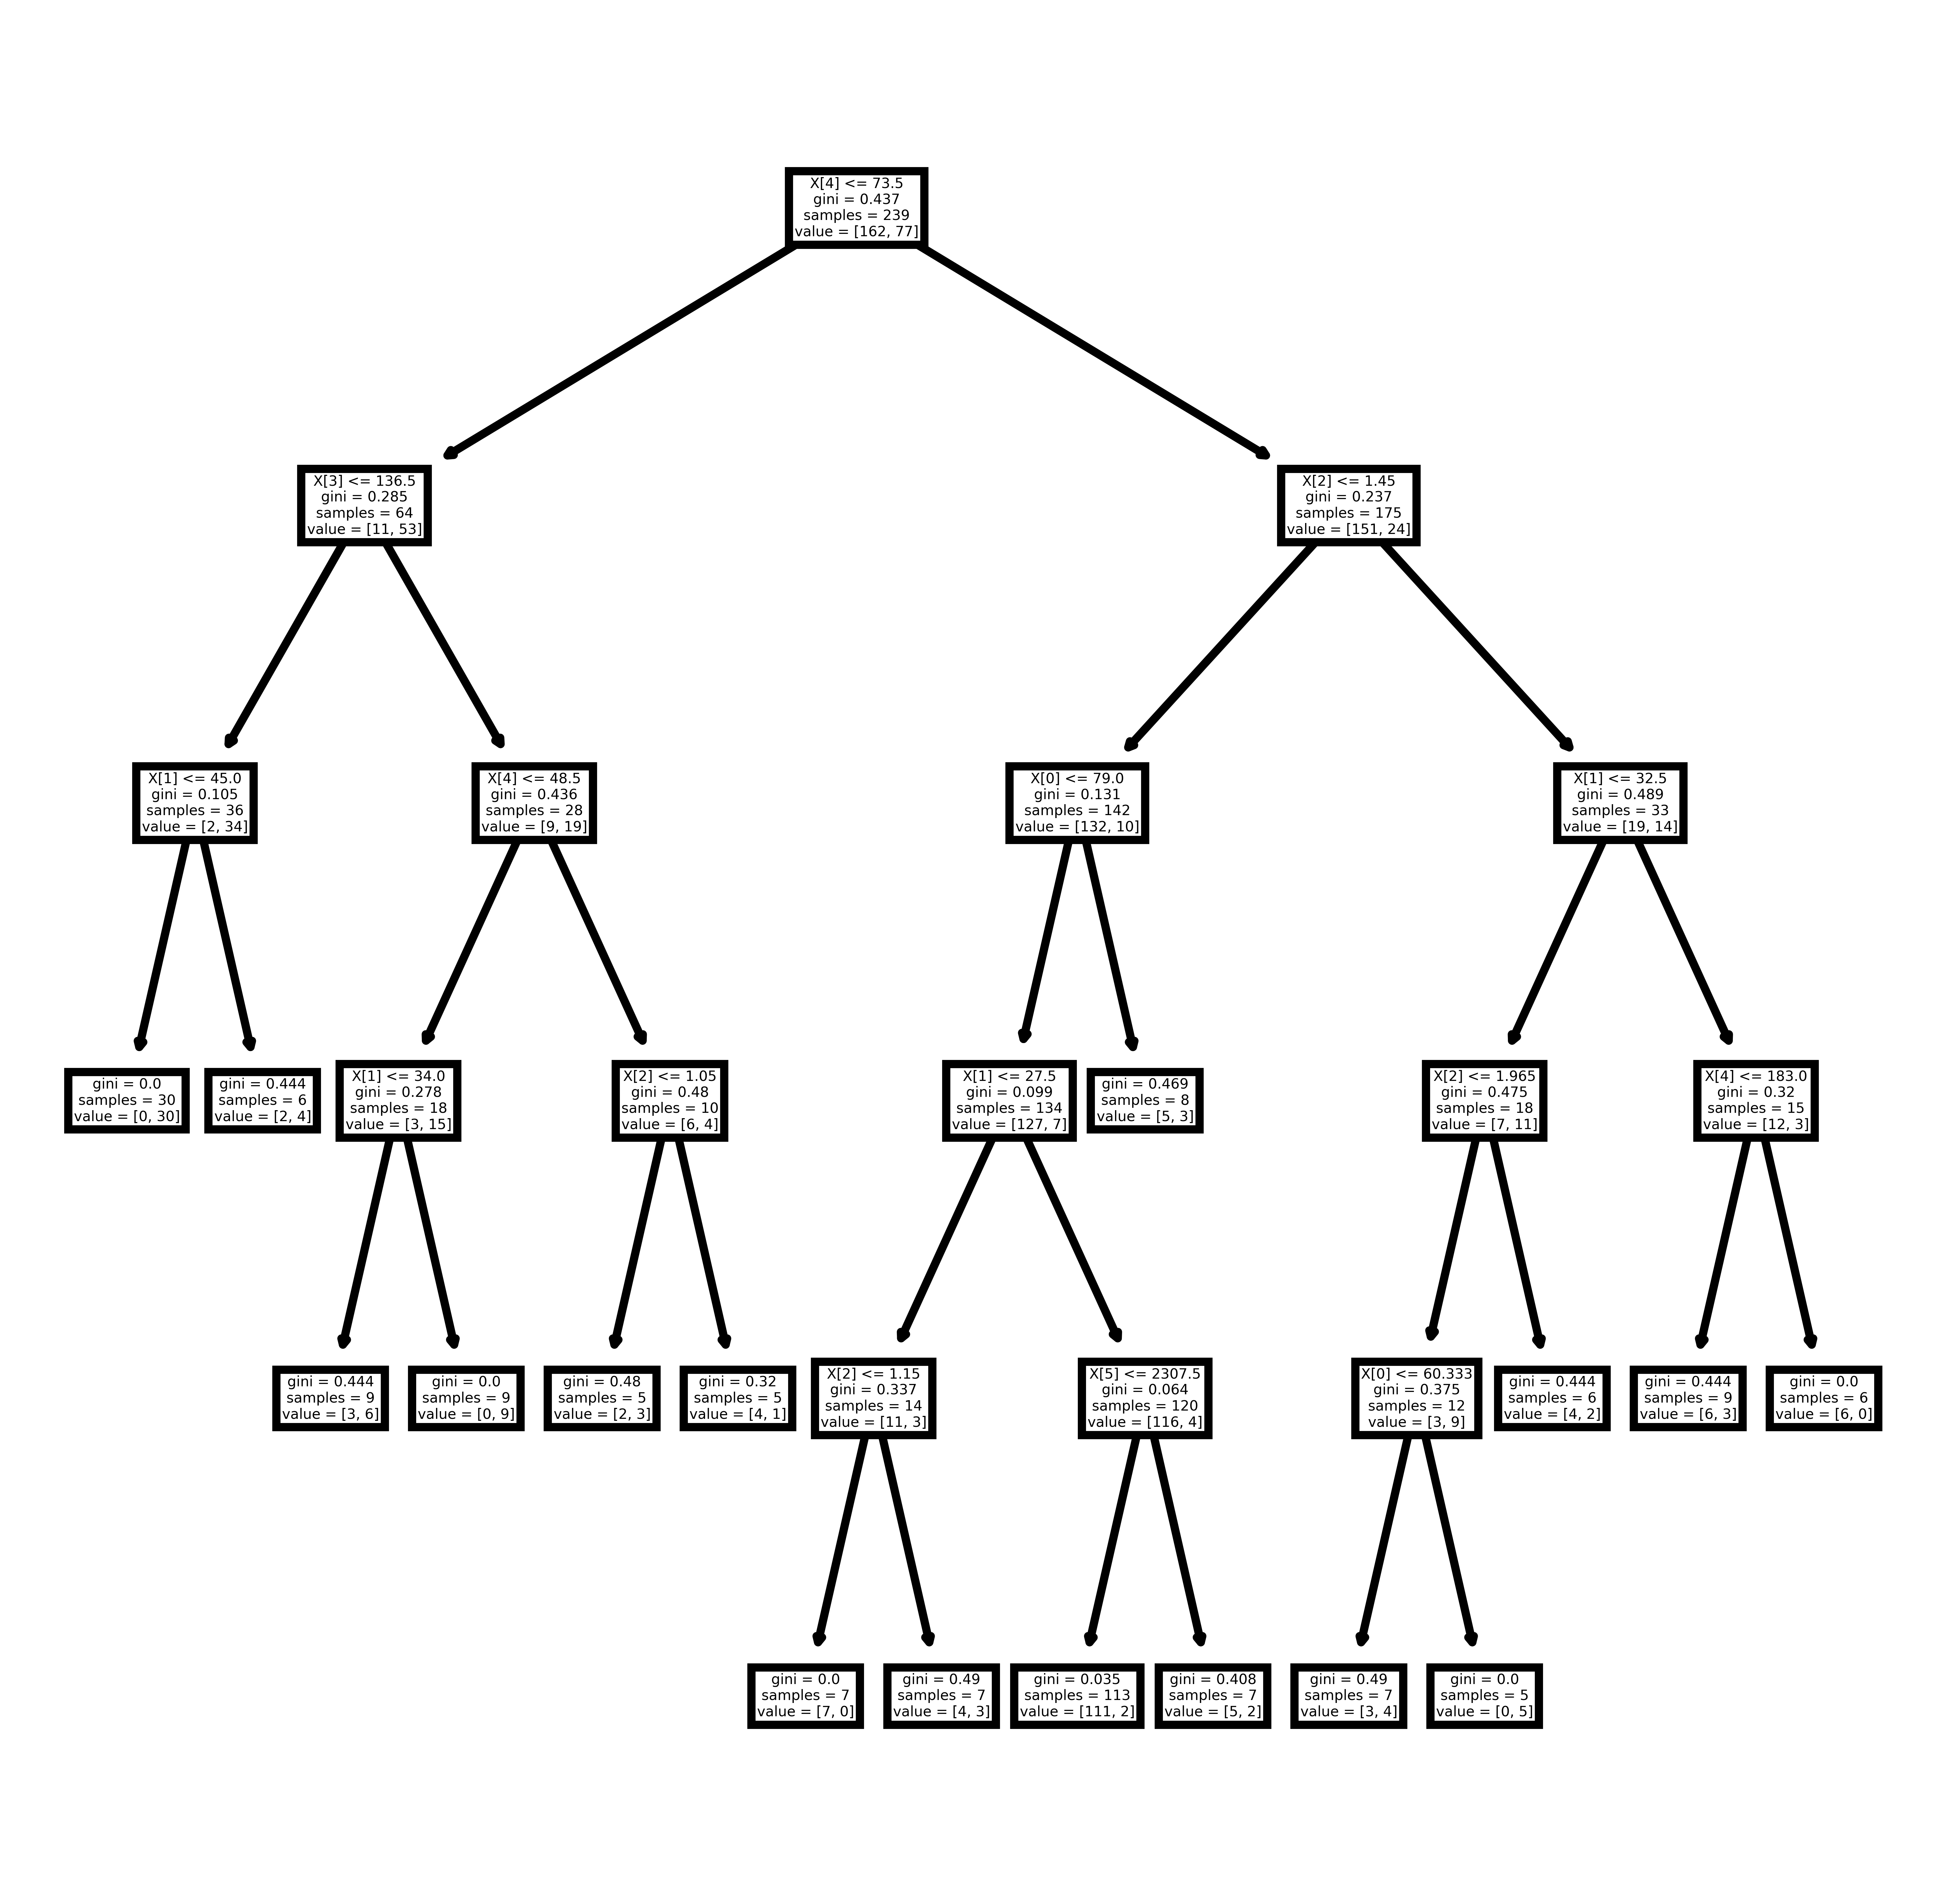

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=2000)
tree.plot_tree(decision_gini);
fig.savefig('imagename.png')

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy=accuracy_score(Y_pred,Y_test)*100
print("Accuracy of the model is {:.2f}".format(accuracy))
confusion_matrix(Y_pred,Y_test)

Accuracy of the model is 83.33


array([[39,  8],
       [ 2, 11]])

              precision    recall  f1-score   support

           0       0.83      0.95      0.89        41
           1       0.85      0.58      0.69        19

    accuracy                           0.83        60
   macro avg       0.84      0.77      0.79        60
weighted avg       0.83      0.83      0.82        60



Text(0.5, 1.0, 'decision tree')

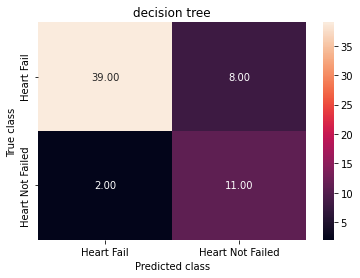

In [ ]:
print(classification_report(Y_test, Y_pred))
dc_cm = metrics.confusion_matrix(Y_pred, Y_test)
sns.heatmap(dc_cm, annot=True, fmt='.2f',
xticklabels = ["Heart Fail","Heart Not Failed"] ,
yticklabels = ["Heart Fail","Heart Not Failed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('decision tree')

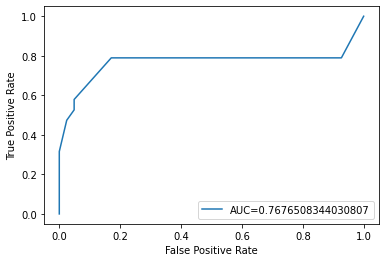

In [ ]:
y_pred_proba =decision_gini.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

###**LINEAR SVM**

In [ ]:
classi = SVC(kernel='linear', random_state=0)  
classi.fit(X_train, Y_train)  

SVC(kernel='linear', random_state=0)

In [ ]:
Y_pred= classi.predict(X_test)  
cm= confusion_matrix(Y_test, Y_pred)  
print(cm)

[[38  3]
 [ 7 12]]


SVM Linear:  0.8333333333333334
              precision    recall  f1-score   support

           0       0.84      0.93      0.88        41
           1       0.80      0.63      0.71        19

    accuracy                           0.83        60
   macro avg       0.82      0.78      0.79        60
weighted avg       0.83      0.83      0.83        60



Text(0.5, 1.0, 'SVM Linear')

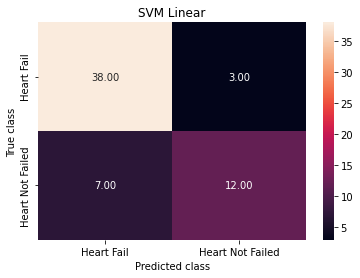

In [ ]:
print("SVM Linear: ",classi.score(X_test, Y_test))
print(classification_report(Y_test, Y_pred))

cm= confusion_matrix(Y_test, Y_pred)  
sns.heatmap(cm, annot=True, fmt='.2f',
xticklabels = ["Heart Fail","Heart Not Failed"] ,
yticklabels = ["Heart Fail","Heart Not Failed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('SVM Linear')



##**RBF SVM**




In [ ]:
classi = SVC(kernel='rbf', random_state=0)  
classi.fit(X_train, Y_train)  

SVC(random_state=0)

In [ ]:
Y_pred= classi.predict(X_test)  
cm= confusion_matrix(Y_test, Y_pred)  
print(cm)

[[41  0]
 [19  0]]


RBF SVM:  0.6833333333333333
              precision    recall  f1-score   support

           0       0.68      1.00      0.81        41
           1       0.00      0.00      0.00        19

    accuracy                           0.68        60
   macro avg       0.34      0.50      0.41        60
weighted avg       0.47      0.68      0.55        60



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'RBF SVM')

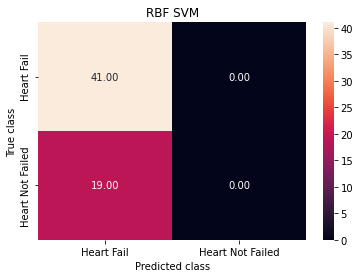

In [ ]:
print("RBF SVM: ",classi.score(X_test, Y_test))
print(classification_report(Y_test, Y_pred))

cm= confusion_matrix(Y_test, Y_pred)  
sns.heatmap(cm, annot=True, fmt='.2f',
xticklabels = ["Heart Fail","Heart Not Failed"] ,
yticklabels = ["Heart Fail","Heart Not Failed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('RBF SVM')



## **ADA BOOST**

In [ ]:
classifier=AdaBoostClassifier()
classifier.fit(X_train, Y_train)  

AdaBoostClassifier()

In [ ]:
Y_pred= classifier.predict(X_test)  
cm= confusion_matrix(Y_test, Y_pred)  
print(cm)

[[37  4]
 [ 6 13]]


ADA BOOST:  0.8333333333333334
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        41
           1       0.76      0.68      0.72        19

    accuracy                           0.83        60
   macro avg       0.81      0.79      0.80        60
weighted avg       0.83      0.83      0.83        60



Text(0.5, 1.0, 'ADA BOOST')

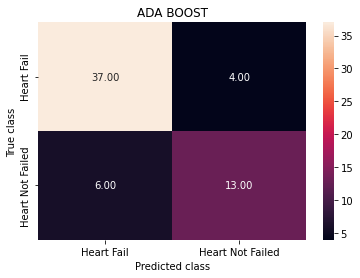

In [ ]:
print("ADA BOOST: ",classifier.score(X_test, Y_test))
print(classification_report(Y_test, Y_pred))

cm= confusion_matrix(Y_test, Y_pred)  
sns.heatmap(cm, annot=True, fmt='.2f',
xticklabels = ["Heart Fail","Heart Not Failed"] ,
yticklabels = ["Heart Fail","Heart Not Failed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('ADA BOOST')



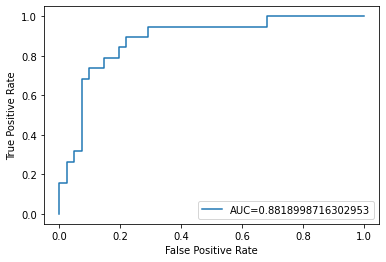

In [ ]:
y_pred_proba =classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## **MLP Classifier**

In [ ]:
classifier=MLPClassifier(random_state=2021)
classifier.fit(X_train, Y_train)  

MLPClassifier(random_state=2021)

In [ ]:
Y_pred= classifier.predict(X_test)  
cm= confusion_matrix(Y_test, Y_pred)  
print(cm)

[[35  6]
 [ 6 13]]


MLP Classifier:  0.8
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        41
           1       0.68      0.68      0.68        19

    accuracy                           0.80        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.80      0.80      0.80        60



Text(0.5, 1.0, 'MLP Classifier')

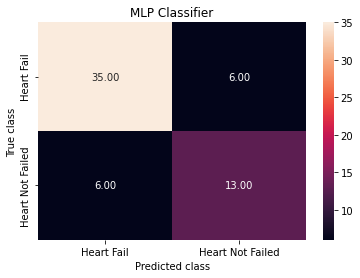

In [ ]:
print("MLP Classifier: ",classifier.score(X_test, Y_test))
print(classification_report(Y_test, Y_pred))

cm= confusion_matrix(Y_test, Y_pred)  
sns.heatmap(cm, annot=True, fmt='.2f',
xticklabels = ["Heart Fail","Heart Not Failed"] ,
yticklabels = ["Heart Fail","Heart Not Failed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('MLP Classifier')

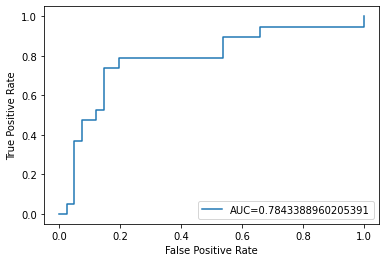

In [ ]:
y_pred_proba =classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## **Quadratic Discriminant Analysis**

In [ ]:
classifier = QuadraticDiscriminantAnalysis()
classifier.fit(X_train, Y_train)  

QuadraticDiscriminantAnalysis()

In [ ]:
Y_pred= classifier.predict(X_test)  
cm= confusion_matrix(Y_test, Y_pred)  
print(cm)

[[38  3]
 [13  6]]


Quadratic Discriminant Analysis:  0.7333333333333333
              precision    recall  f1-score   support

           0       0.75      0.93      0.83        41
           1       0.67      0.32      0.43        19

    accuracy                           0.73        60
   macro avg       0.71      0.62      0.63        60
weighted avg       0.72      0.73      0.70        60



Text(0.5, 1.0, 'Quadratic Discriminant Analysis')

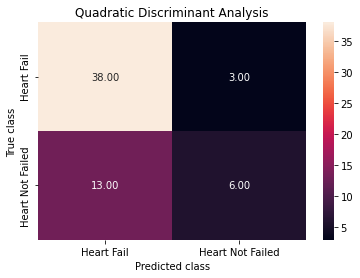

In [ ]:
print("Quadratic Discriminant Analysis: ",classifier.score(X_test, Y_test))
print(classification_report(Y_test, Y_pred))

cm= confusion_matrix(Y_test, Y_pred)  
sns.heatmap(cm, annot=True, fmt='.2f',
xticklabels = ["Heart Fail","Heart Not Failed"] ,
yticklabels = ["Heart Fail","Heart Not Failed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Quadratic Discriminant Analysis')

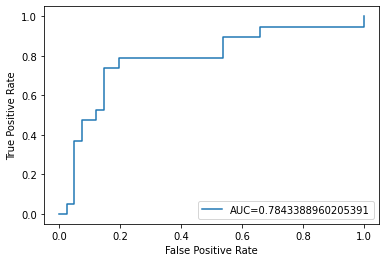

In [ ]:
vy_pred_proba =classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## **Gradient Boosting Classifier**

In [ ]:
classifier=GradientBoostingClassifier(random_state=2021,learning_rate=0.1)
classifier.get_params()
classifier.fit(X_train, Y_train)  

GradientBoostingClassifier(random_state=2021)

In [ ]:
Y_pred= classifier.predict(X_test)  
cm= confusion_matrix(Y_test, Y_pred)  
print(cm)

[[36  5]
 [ 4 15]]


Gradient Boost Classifier:  0.85
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        41
           1       0.75      0.79      0.77        19

    accuracy                           0.85        60
   macro avg       0.82      0.83      0.83        60
weighted avg       0.85      0.85      0.85        60



Text(0.5, 1.0, 'Gradient Boost Classifier')

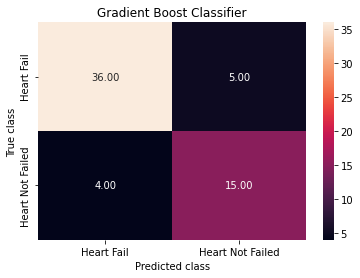

In [ ]:
print("Gradient Boost Classifier: ",classifier.score(X_test, Y_test))
print(classification_report(Y_test, Y_pred))

cm= confusion_matrix(Y_test, Y_pred)  
sns.heatmap(cm, annot=True, fmt='.2f',
xticklabels = ["Heart Fail","Heart Not Failed"] ,
yticklabels = ["Heart Fail","Heart Not Failed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Gradient Boost Classifier')

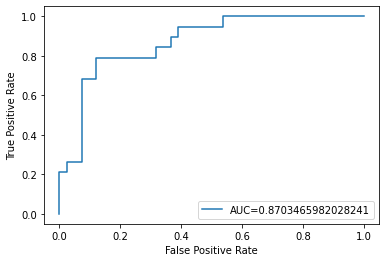

In [ ]:
y_pred_proba =classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## **Light Gradient Boosting Machine**

In [ ]:
fit_params={"early_stopping_rounds":10, 
            "eval_metric" : 'auc', 
            "eval_set" : [(X_test,Y_test)],
            'eval_names': ['valid'],
            'verbose': 100,
            'feature_name': 'auto', 
            'categorical_feature': 'auto' 
}

classifier = lgb.LGBMClassifier(num_leaves= 15, max_depth=-1, 
                         random_state=314, 
                         silent=True, 
                         metric='None', 
                         n_jobs=4, 
                         n_estimators=1000,
                         colsample_bytree=0.9,
                         subsample=0.9,
                         learning_rate=0.1)
classifier.fit(X_train, Y_train)  

LGBMClassifier(colsample_bytree=0.9, metric='None', n_estimators=1000, n_jobs=4,
               num_leaves=15, random_state=314, subsample=0.9)

In [ ]:
Y_pred= classifier.predict(X_test)  
cm= confusion_matrix(Y_test, Y_pred)  
print(cm)

[[37  4]
 [ 7 12]]


Light Gradient Boosting Machine:  0.8166666666666667
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        41
           1       0.75      0.63      0.69        19

    accuracy                           0.82        60
   macro avg       0.80      0.77      0.78        60
weighted avg       0.81      0.82      0.81        60



Text(0.5, 1.0, 'Light Gradient Boosting Machine')

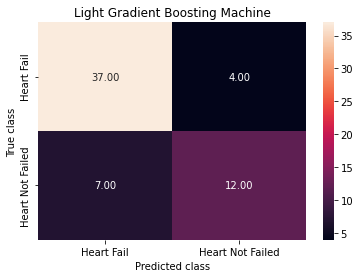

In [ ]:
print("Light Gradient Boosting Machine: ",classifier.score(X_test, Y_test))
print(classification_report(Y_test, Y_pred))

cm= confusion_matrix(Y_test, Y_pred)  
sns.heatmap(cm, annot=True, fmt='.2f',
xticklabels = ["Heart Fail","Heart Not Failed"] ,
yticklabels = ["Heart Fail","Heart Not Failed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Light Gradient Boosting Machine')


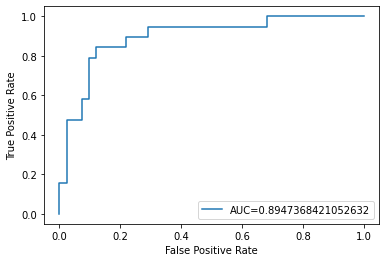

In [ ]:
y_pred_proba =classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## **XGBOOST**

In [ ]:
classifier=XGBClassifier(random_state=2021)
classifier.fit(X_train, Y_train)  

XGBClassifier(random_state=2021)

In [ ]:
Y_pred= classifier.predict(X_test)  
cm= confusion_matrix(Y_test, Y_pred)  
print(cm)

[[38  3]
 [ 4 15]]


XGB Classifier:  0.8833333333333333
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        41
           1       0.83      0.79      0.81        19

    accuracy                           0.88        60
   macro avg       0.87      0.86      0.86        60
weighted avg       0.88      0.88      0.88        60



Text(0.5, 1.0, 'XGB Classifier')

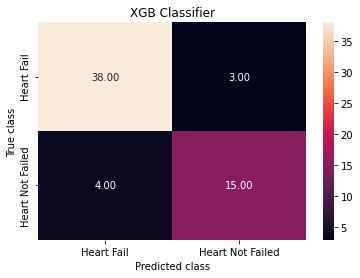

In [ ]:
print("XGB Classifier: ",classifier.score(X_test, Y_test))
print(classification_report(Y_test, Y_pred))

cm= confusion_matrix(Y_test, Y_pred)  
sns.heatmap(cm, annot=True, fmt='.2f',
xticklabels = ["Heart Fail","Heart Not Failed"] ,
yticklabels = ["Heart Fail","Heart Not Failed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('XGB Classifier')

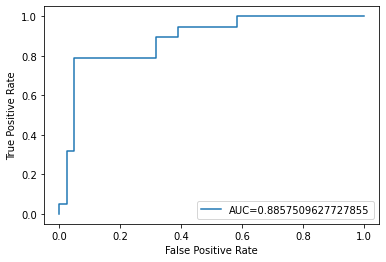

In [ ]:
y_pred_proba =classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## **Extra tree classifier**

In [ ]:
classifier=ExtraTreesClassifier(random_state=2021)
classifier.fit(X_train, Y_train)  

ExtraTreesClassifier(random_state=2021)

In [ ]:
Y_pred= classifier.predict(X_test)  
cm= confusion_matrix(Y_test, Y_pred)  
print(cm)

[[38  3]
 [ 7 12]]


Light Gradient Boosting Machine:  0.8333333333333334
              precision    recall  f1-score   support

           0       0.84      0.93      0.88        41
           1       0.80      0.63      0.71        19

    accuracy                           0.83        60
   macro avg       0.82      0.78      0.79        60
weighted avg       0.83      0.83      0.83        60



Text(0.5, 1.0, 'Light Gradient Boosting Machine')

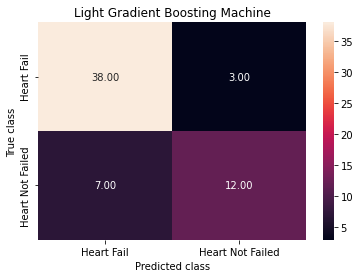

In [ ]:
print("Light Gradient Boosting Machine: ",classifier.score(X_test, Y_test))
print(classification_report(Y_test, Y_pred))

cm= confusion_matrix(Y_test, Y_pred)  
sns.heatmap(cm, annot=True, fmt='.2f',
xticklabels = ["Heart Fail","Heart Not Failed"] ,
yticklabels = ["Heart Fail","Heart Not Failed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Light Gradient Boosting Machine')


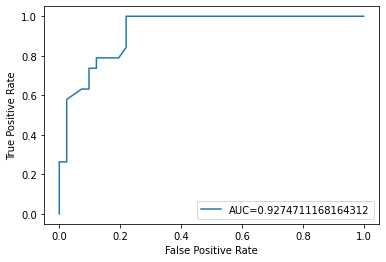

In [ ]:
y_pred_proba =classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()